In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRFRegressor

In [2]:
common_dir=r"C:\Users\DELL\Downloads\minipro\Removal"
X_train_scaled=np.load(fr"{common_dir}\X_train_scaled.npy")
X_test_scaled=np.load(fr"{common_dir}\X_test_scaled.npy")
X_train=np.load(fr"{common_dir}\x_train.npy")
X_test=np.load(fr"{common_dir}\x_test.npy")
y_test=np.load(fr"{common_dir}\y_test.npy")
y_train=np.load(fr"{common_dir}\y_train.npy")
transformed_data_nparray=np.load(fr"{common_dir}\transformed_data.npy")


In [3]:
column_names=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']
transformed_data=pd.DataFrame(transformed_data_nparray,columns=column_names)

In [4]:
X = transformed_data.drop(columns=['AQI'])
y = transformed_data['AQI']


In [5]:

model = XGBRFRegressor(n_estimators=100,max_depth=15, subsample=0.9, colsample_bynode=0.2,random_state=42)
# fit the model on the whole dataset
model.fit(X, y)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=0.2,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

In [6]:
y_pred_train=model.predict(X_train)
# Predict on test set
y_pred = model.predict(X_test)

In [7]:
#train
y_pred_train=model.predict(X_train)
# Predict on test set
y_pred = model.predict(X_test)

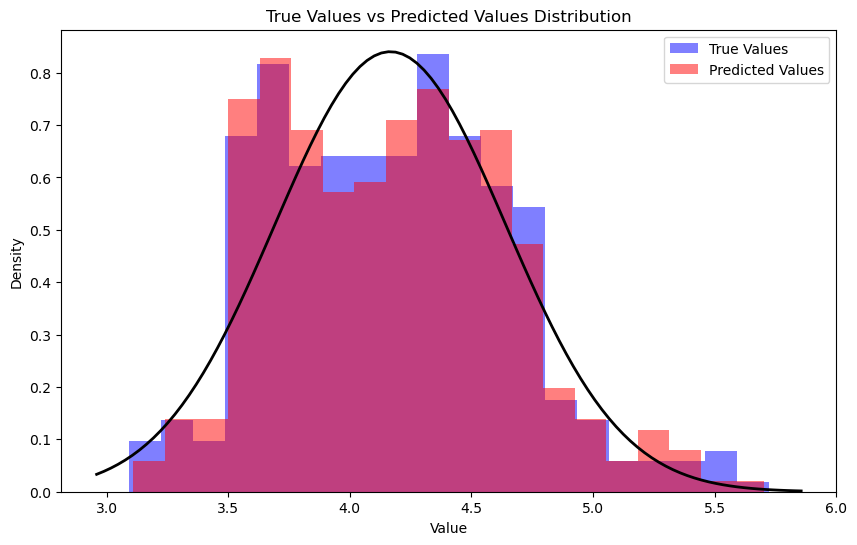

In [8]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred), np.std(y_pred))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution')
plt.legend()
plt.show()

## True Values Vs Predicted Values Scatter Plot

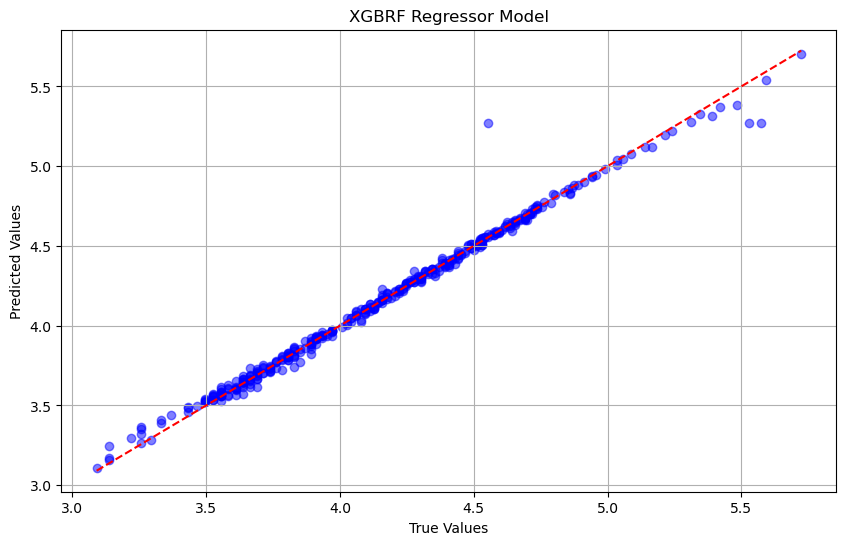

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBRF Regressor Model')
plt.grid(True)
plt.show()

## Residuals vs Predicted Scatter Plot

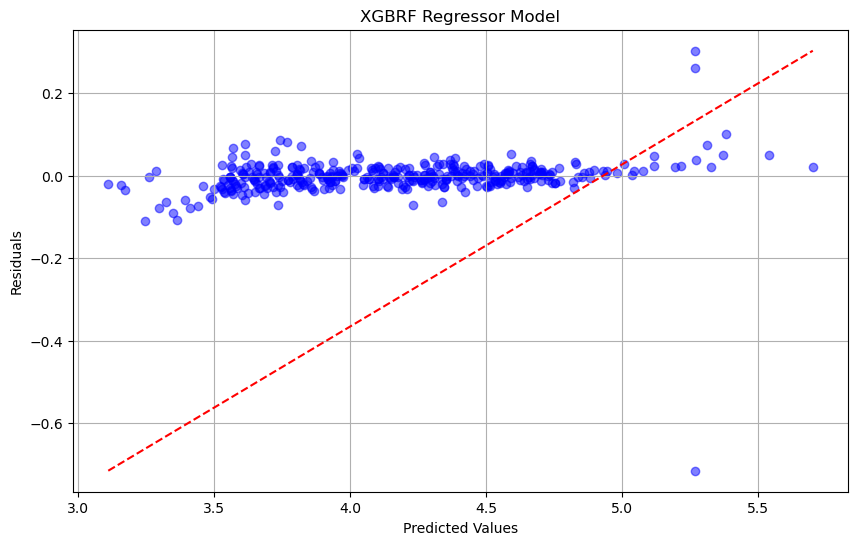

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred,y_test-y_pred , color='blue', alpha=0.5)
plt.plot([min(y_pred), max(y_pred)], [min(y_test-y_pred), max(y_test-y_pred)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBRF Regressor Model')
plt.grid(True)
plt.show()

## Frequency of Residual Histogram

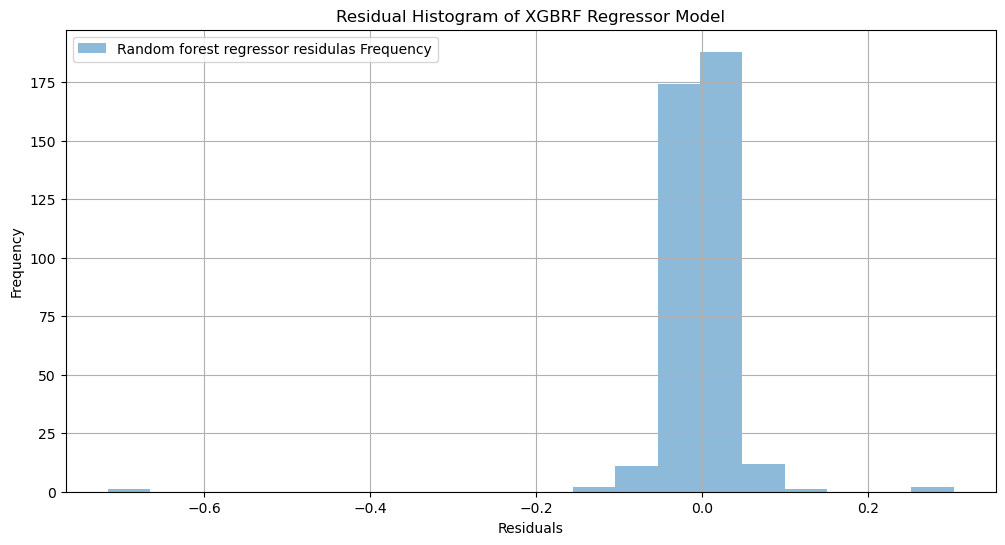

In [11]:
plt.figure(figsize=(12, 6))

plt.hist(y_test-y_pred, bins=20, alpha=0.5, label='Random forest regressor residulas Frequency')

plt.title('Residual Histogram of XGBRF Regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
print("Score for Training Dataset:",model.score(X_train,y_train) * 100)
print("Score for Testing Dataset:",model.score(X_test,y_test)*100)

Score for Training Dataset: 99.6915634764567
Score for Testing Dataset: 98.97682340171175


## Training Scores for XGBRF Regression

In [13]:
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R2", "MAE"))
mse = round(mean_squared_error(y_pred_train, y_train),4)
rmse=round(np.sqrt(mse),4)
r2=round(r2_score(y_pred_train,y_train),4)
mae=round(mean_absolute_error(y_pred_train,y_train),4)
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("XGBRF Regression", mse, rmse, r2, mae))


Model                MSE        RMSE       R2         MAE       
XGBRF Regression     0.0006     0.0245     0.9968     0.0185    


## Testing Scores for XGBRF Regression

In [14]:
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R2", "MAE"))
mse = round(mean_squared_error(y_test, y_pred),4)
rmse=round(np.sqrt(mse),4)
r2=round(r2_score(y_test,y_pred),4)
mae=round(mean_absolute_error(y_test,y_pred),4)
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("XGBRF Regression", mse, rmse, r2, mae))

Model                MSE        RMSE       R2         MAE       
XGBRF Regression     0.0024     0.049      0.9898     0.0222    
